<a href="https://colab.research.google.com/github/KoustovKhamaru/CODSOFT/blob/Master-project-file/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This machine learning project aims to tackle the process of predicting customer churn.
Customer churn is the percentage of customers who no longer use a company's product company for a period of time.

This project has been done by Koustov Khamaru as a part of the Machine Learning Internship program of CodSoft.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

The 'CSV' file is imported as df1

In [ ]:
df1 = pd.read_csv('Churn_Modelling.csv')
df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df1.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Checking for null values in the dataset

In [ ]:
df1.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

From the above we can derive the fact that there are no null values

In [ ]:
df1.corr()

<ipython-input-10-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


EDA is being done on the dataset to find certain trends that might be useful for the model

<Axes: xlabel='Age', ylabel='count'>

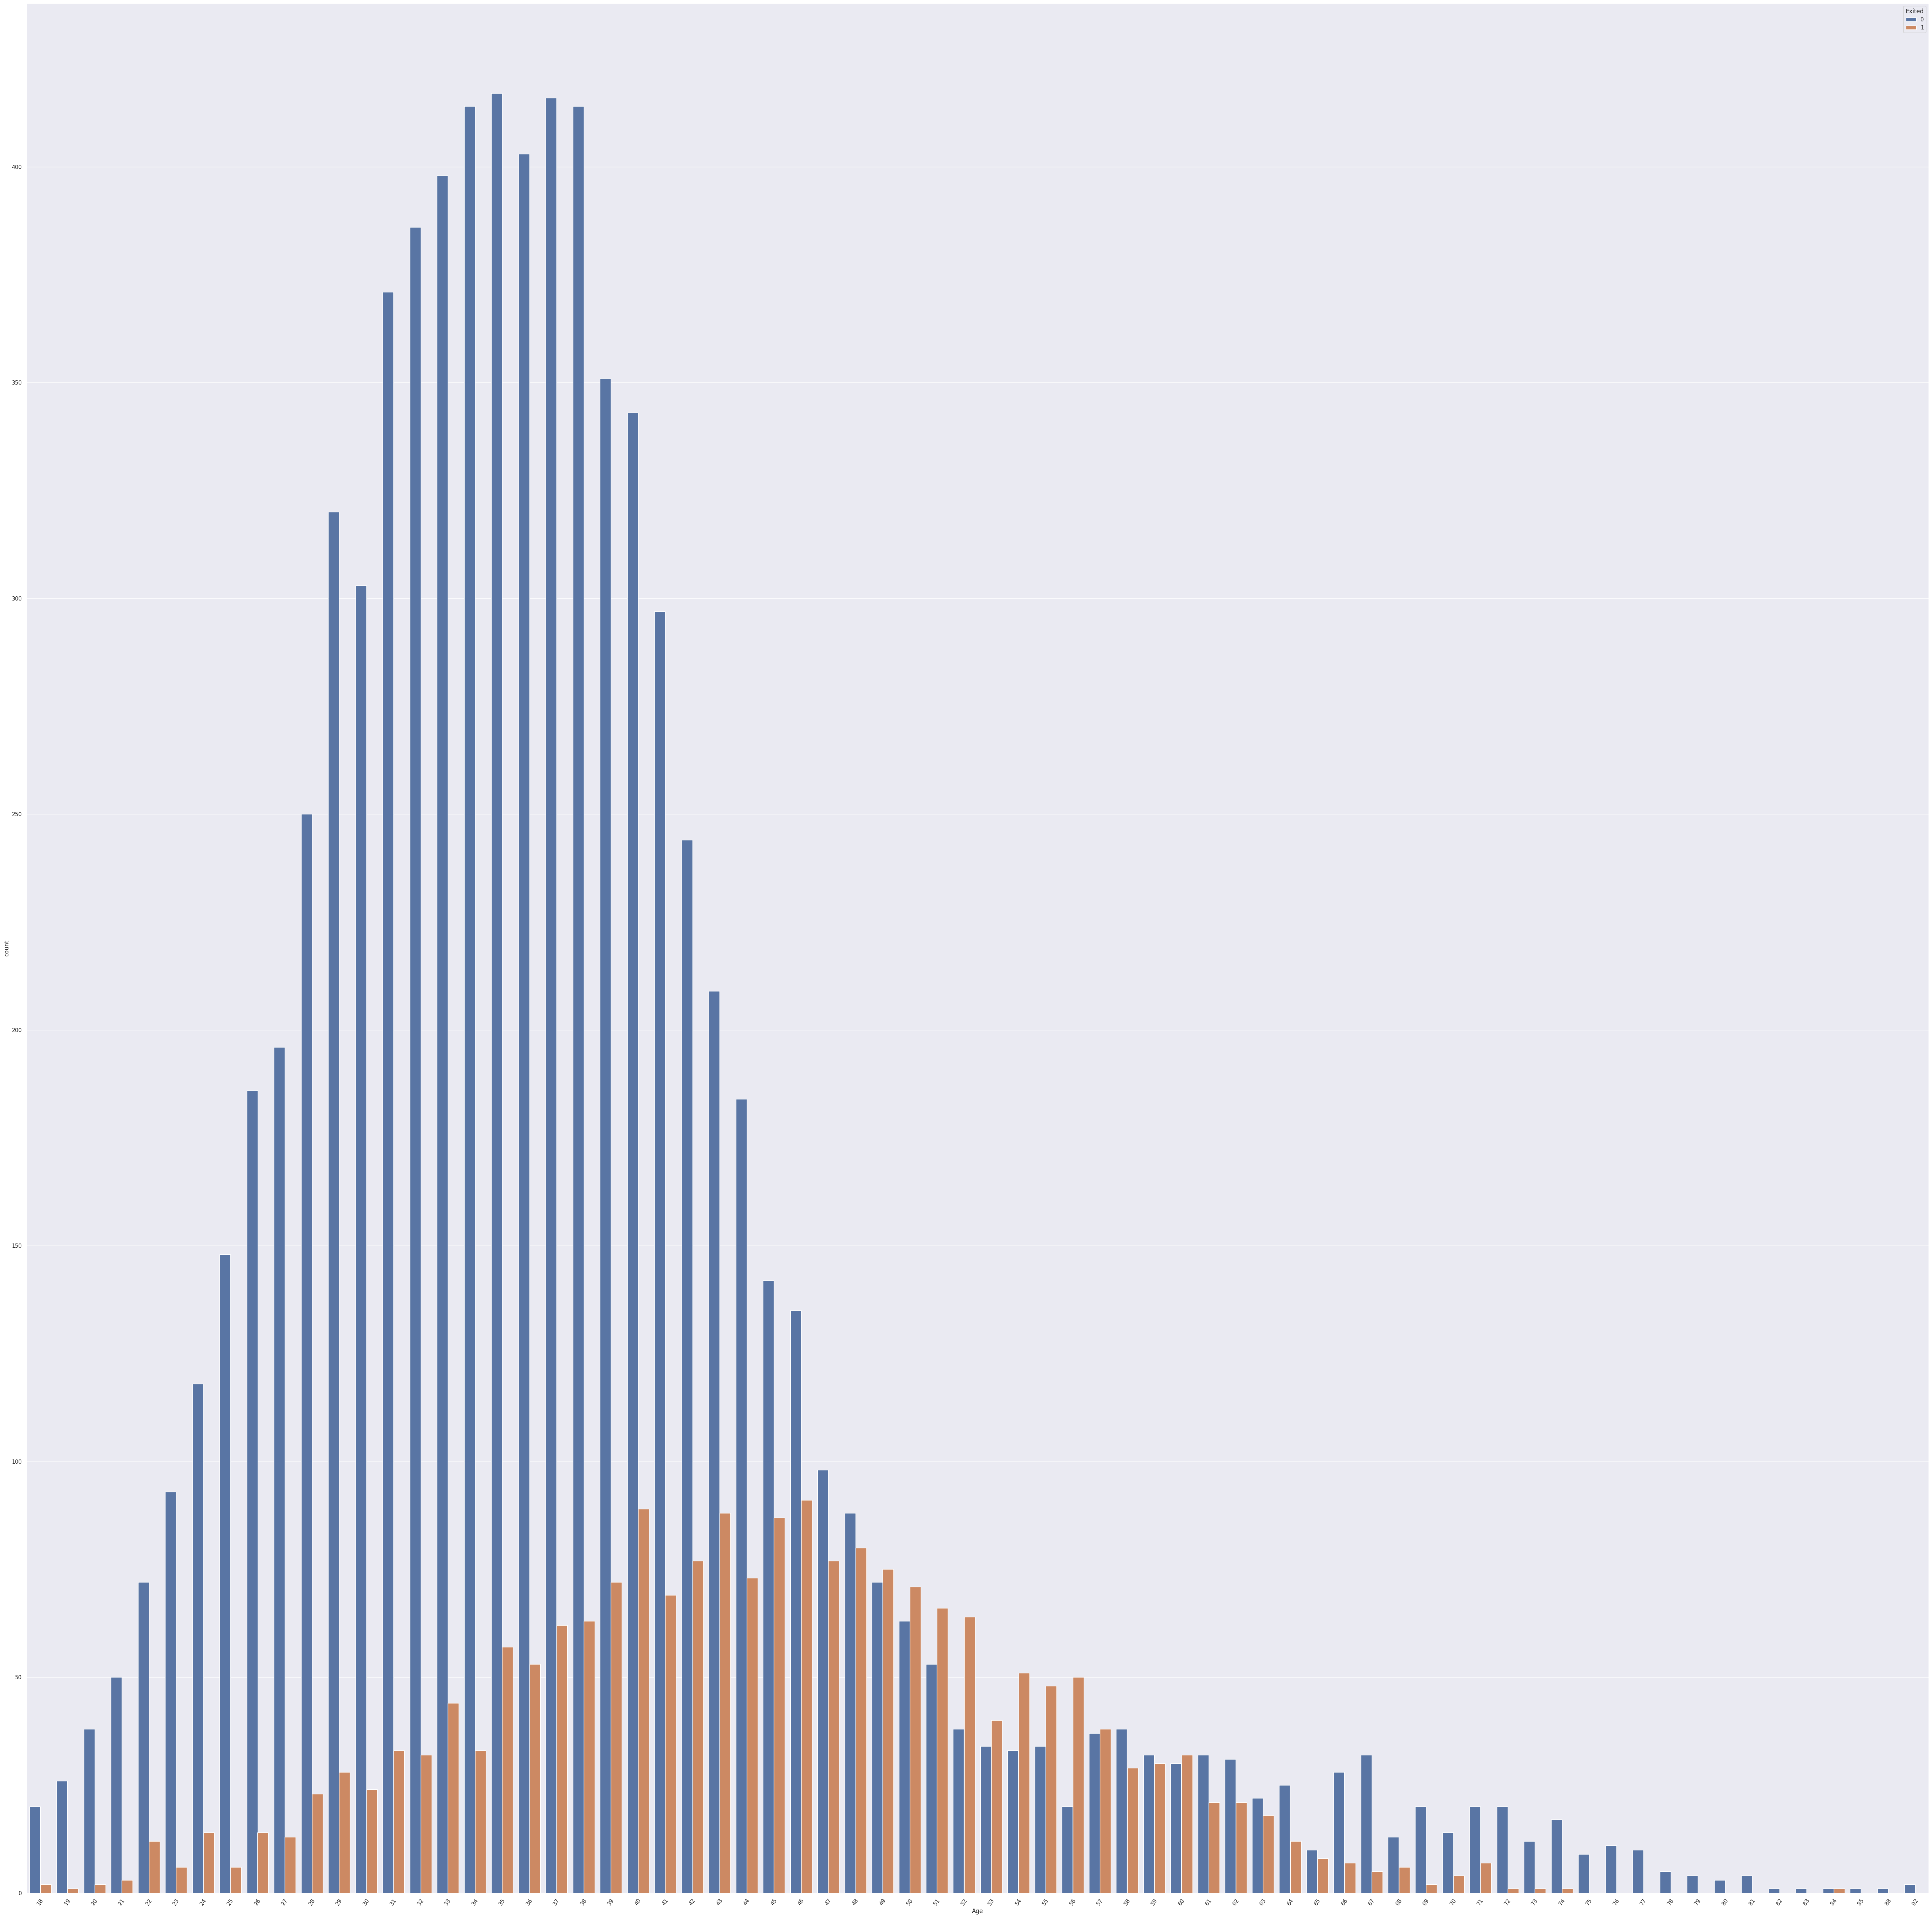

In [ ]:
plt.figure(figsize = (70,70))
plt.xticks(rotation = 55)
sns.countplot(x = 'Age', hue = 'Exited', data = df1)

<Axes: xlabel='IsActiveMember', ylabel='count'>

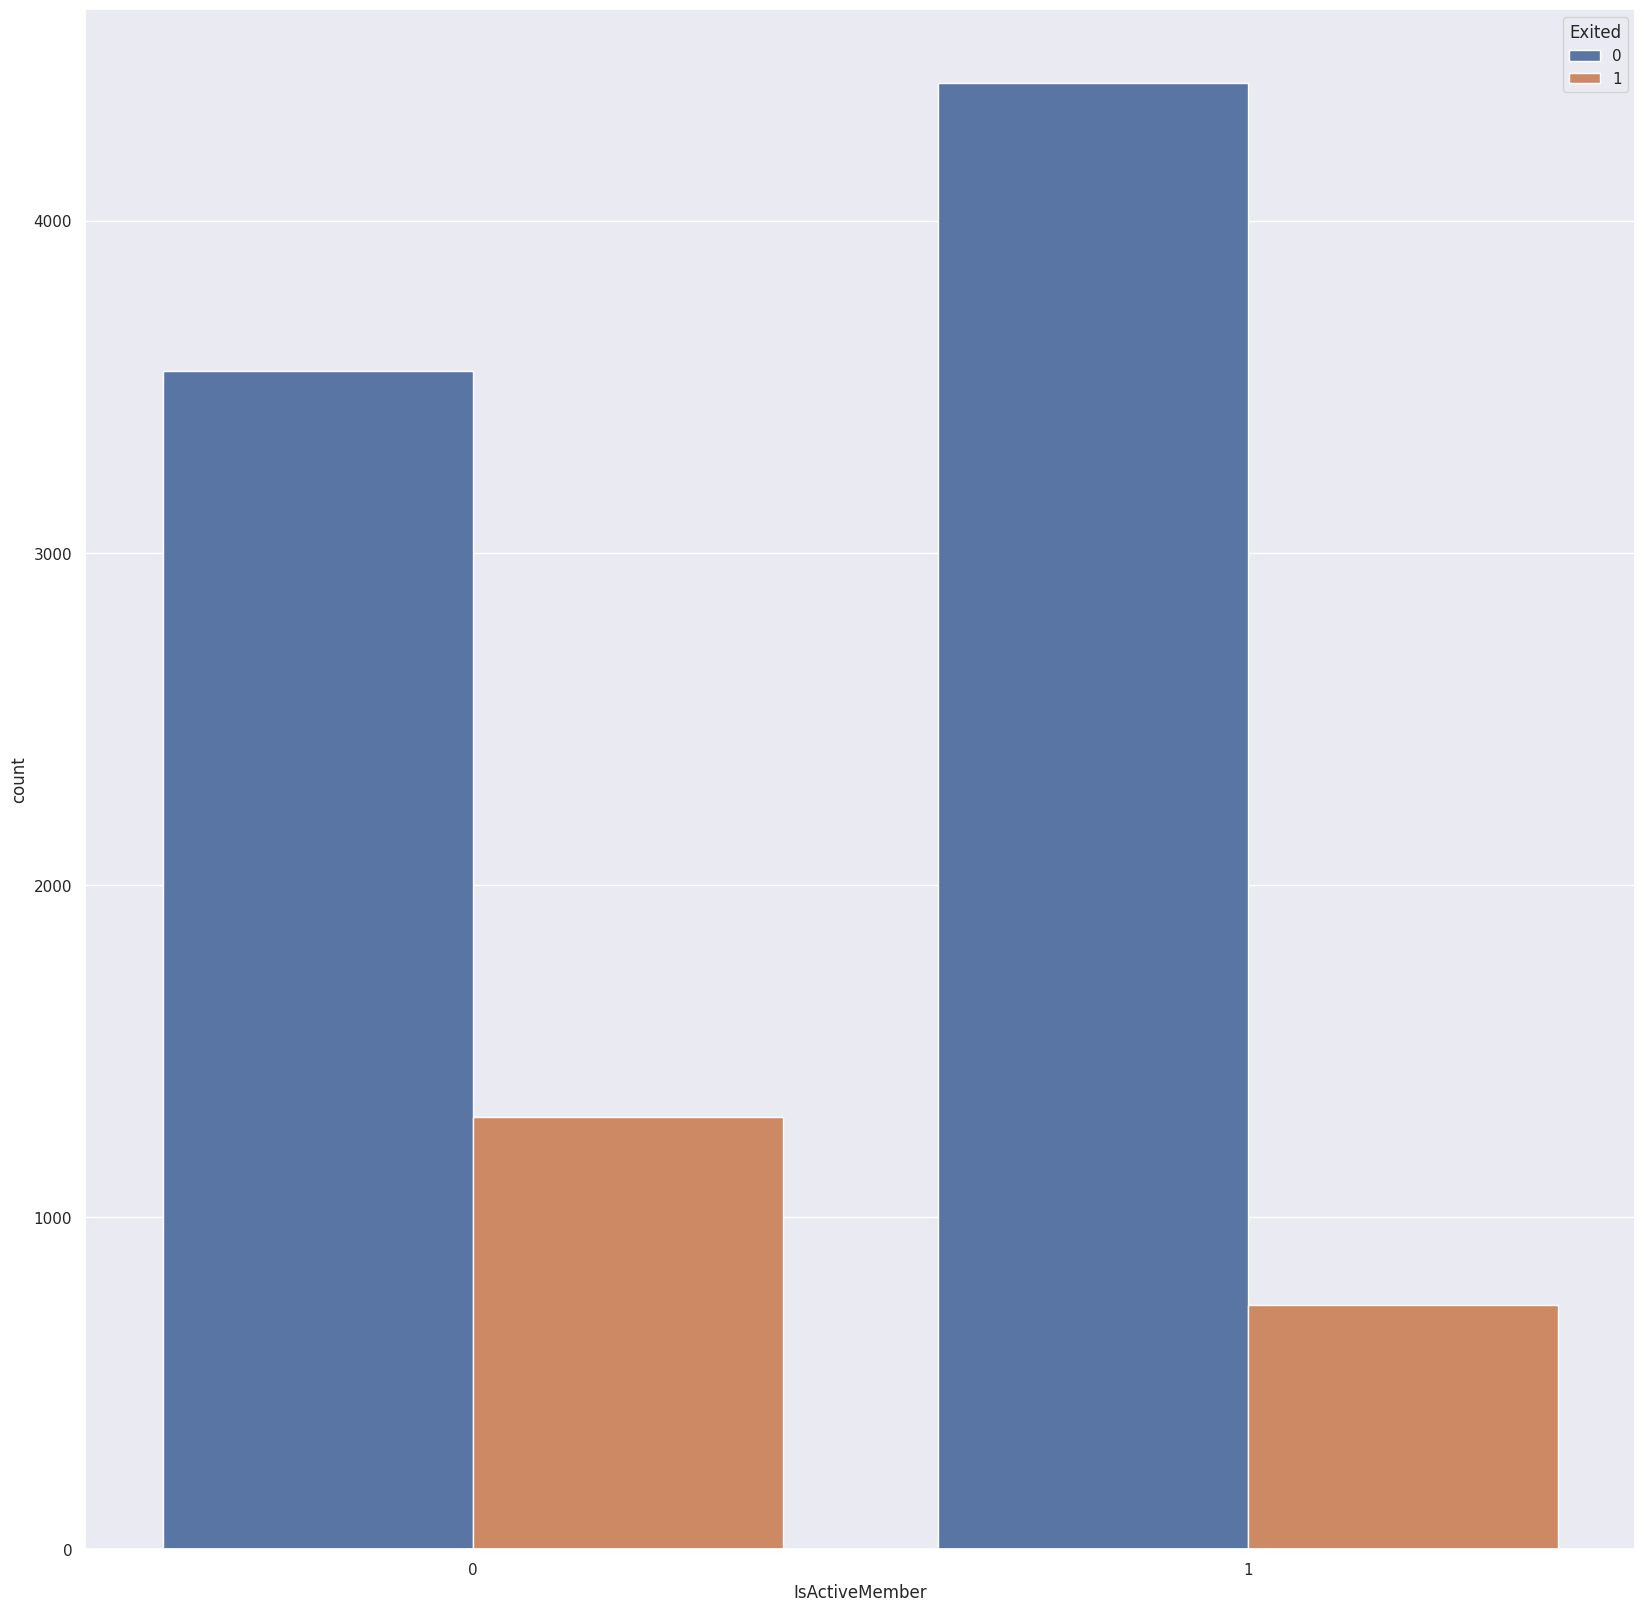

In [ ]:
plt.figure(figsize = (20,20))
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df1)

<ipython-input-40-360b2c710c23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr())


<Axes: >

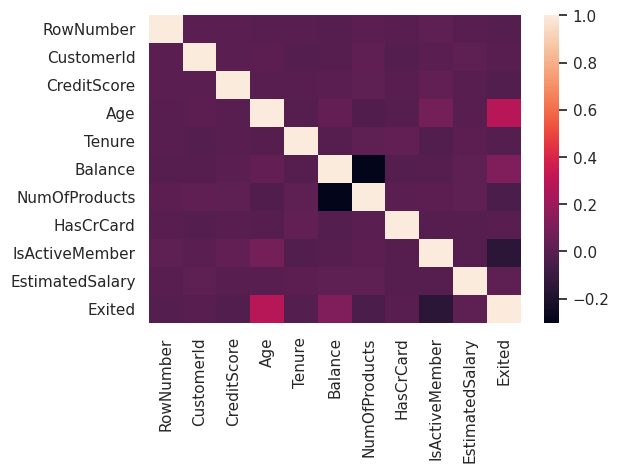

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df1.corr())

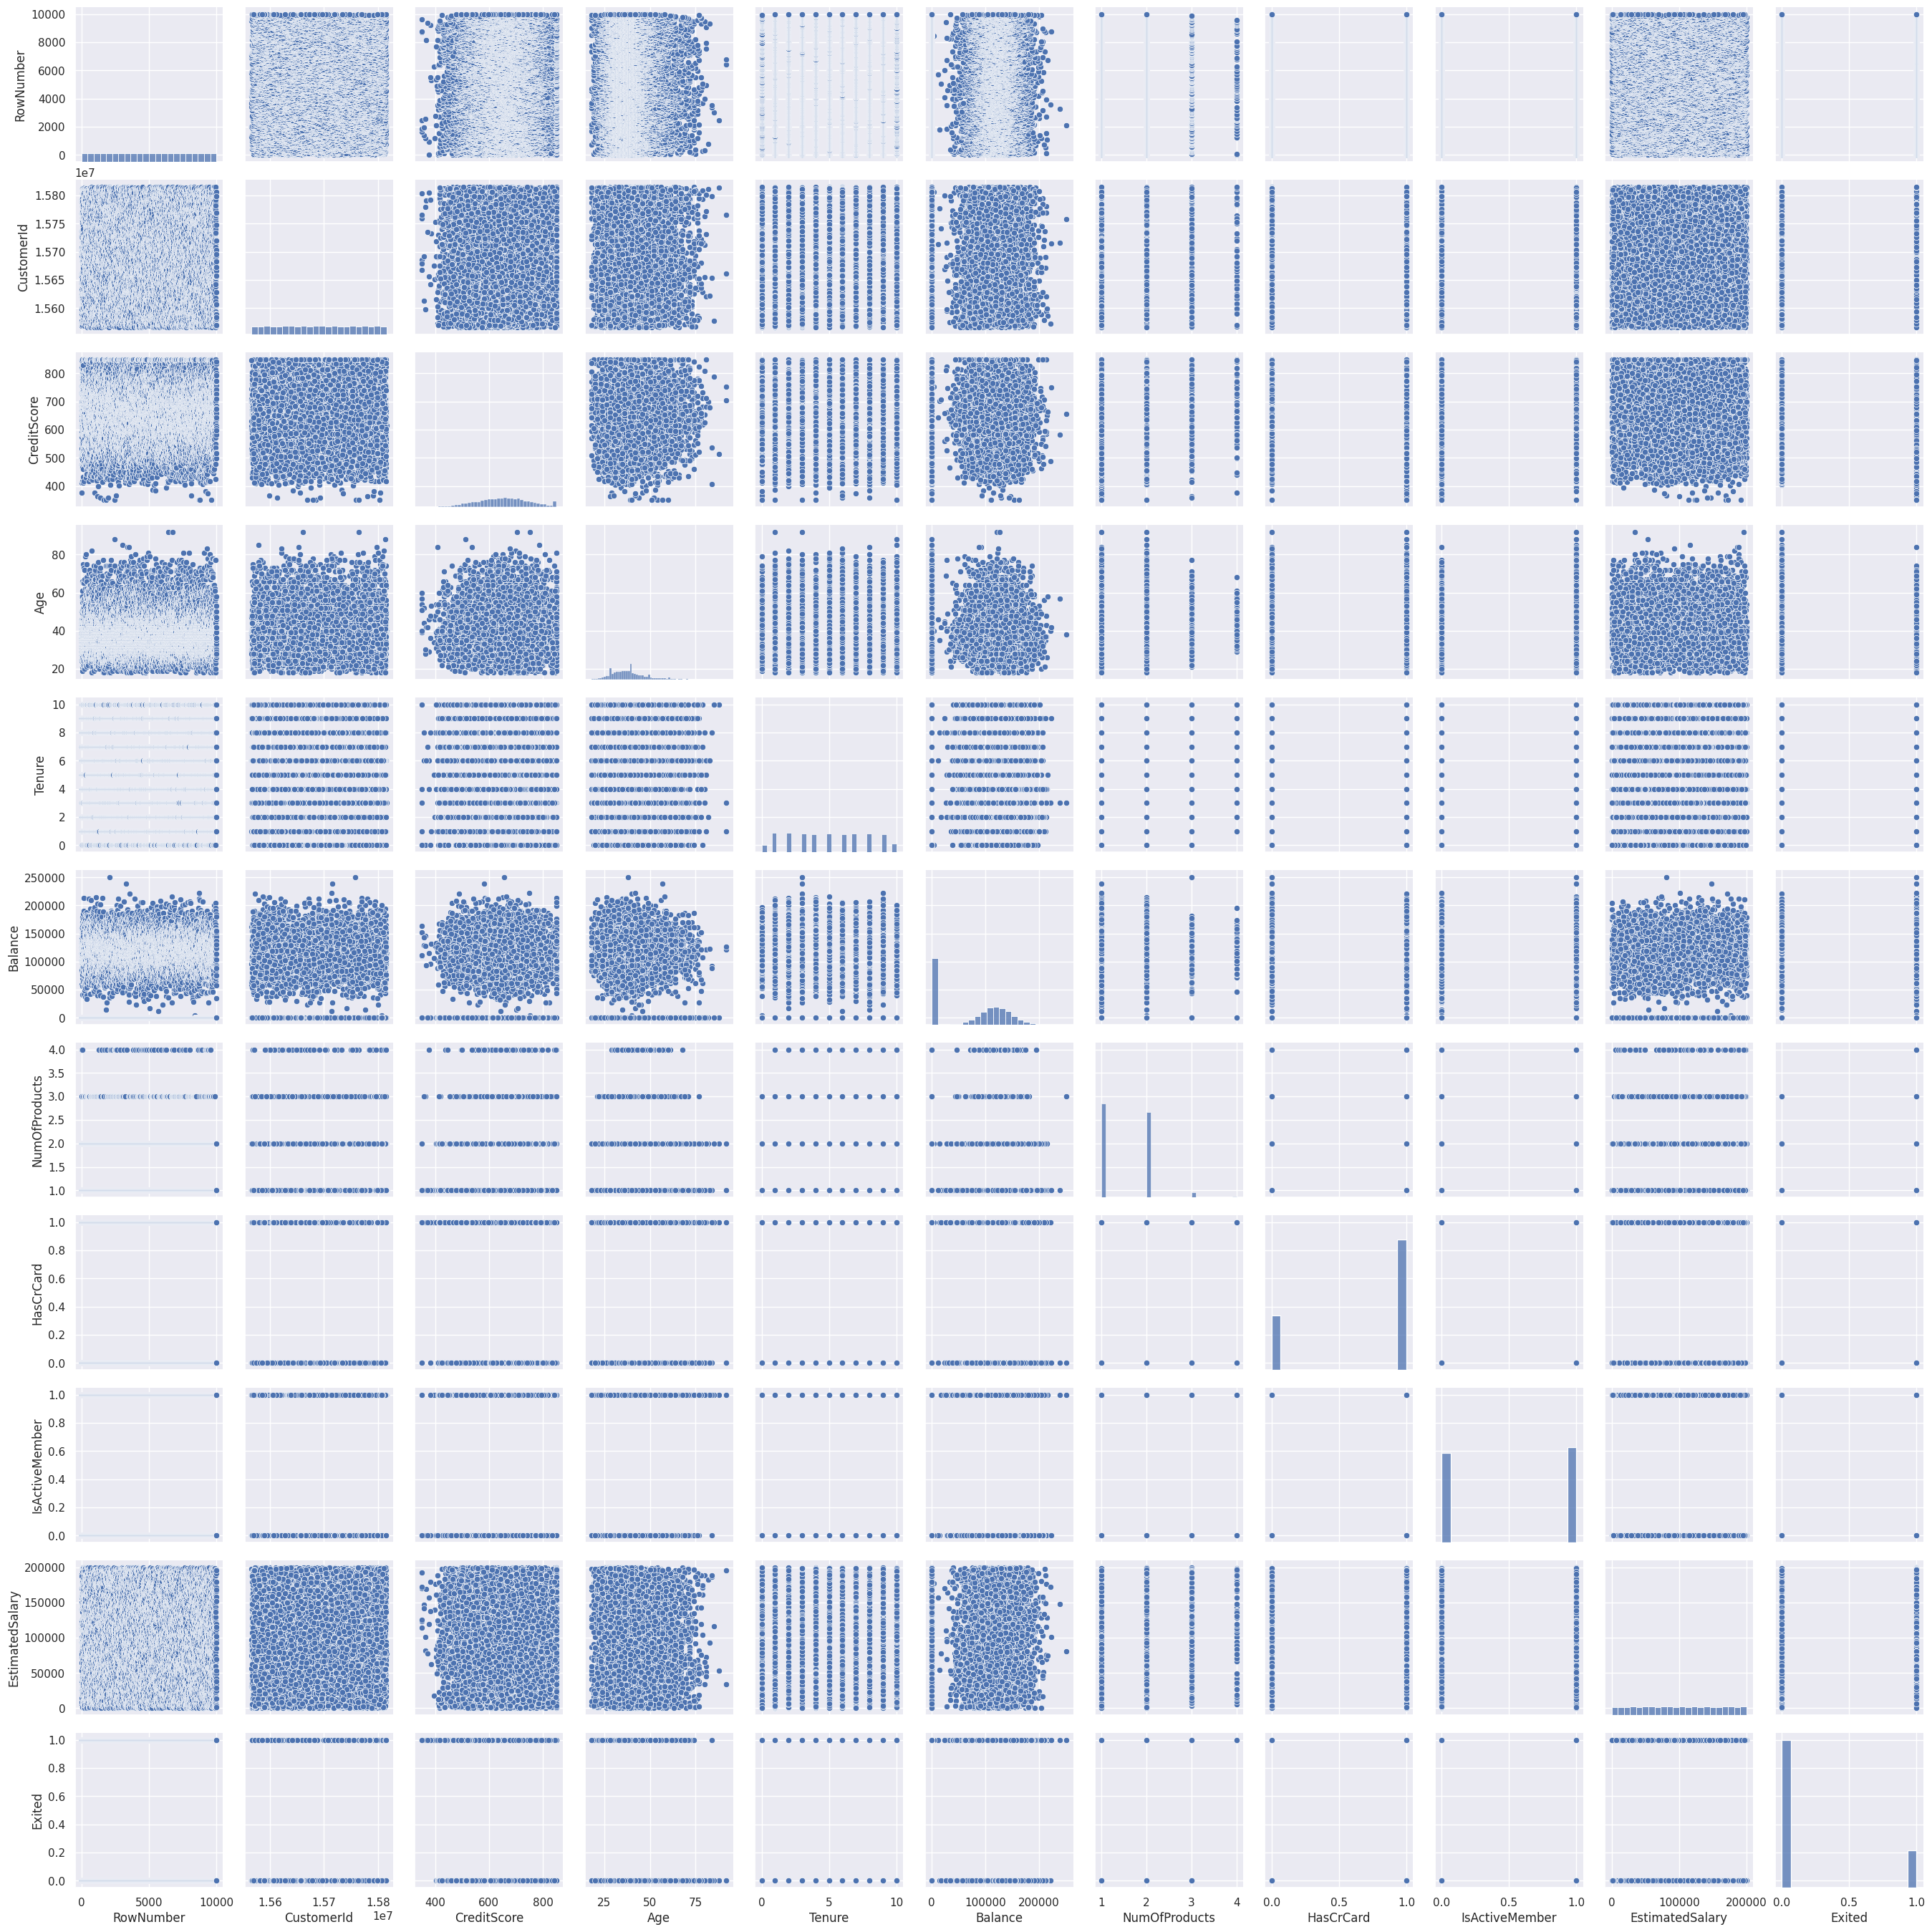

In [ ]:
sns.pairplot(df1)
plt.show()

Checking for dummy values

In [ ]:
x = df1.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df1['Exited']
x = pd.get_dummies(x, columns=['Geography', 'Gender'], drop_first=True)

Now training and testing is being performed

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=40)

In [ ]:
slr = StandardScaler()

In [ ]:
x_train = slr.fit_transform(x_train)
x_test = slr.transform(x_test)

From here various classification models are being used to find out the model with the highest accuracy  

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
LR= LogisticRegression()

In [ ]:
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred_Log= LR.predict(x_test)

In [ ]:
print('LR Accuracy: ', accuracy_score(y_test, pred_Log))

LR Accuracy:  0.8058


In [ ]:
classifyLR = classification_report(y_test,pred_Log)

In [ ]:
print("LR Classification Report: ", classifyLR)

LR Classification Report:                precision    recall  f1-score   support

           0       0.82      0.96      0.89      3969
           1       0.58      0.21      0.30      1031

    accuracy                           0.81      5000
   macro avg       0.70      0.58      0.60      5000
weighted avg       0.77      0.81      0.77      5000



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [ ]:
pred_dtc = dtc.predict(x_test)
print('DTC Accuracy: ', accuracy_score(y_test, pred_dtc))

DTC Accuracy:  0.7842


In [ ]:
classifyDTC = classification_report(y_test,pred_dtc)
print("DTC Classification Report: ", classifyDTC)

DTC Classification Report:                precision    recall  f1-score   support

           0       0.86      0.87      0.86      3969
           1       0.48      0.46      0.47      1031

    accuracy                           0.78      5000
   macro avg       0.67      0.66      0.67      5000
weighted avg       0.78      0.78      0.78      5000



In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 30)
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_test)
print('Accuracy after XGBOOST: ', accuracy_score(y_test,pred_xgb))

Accuracy after XGBOOST:  0.8568


In [ ]:
classifyXGB = classification_report(y_test,pred_xgb)
print("Classification Report after using XGBOOST Classifier: ", classifyXGB)

Classification Report after using XGBOOST Classifier:                precision    recall  f1-score   support

           0       0.88      0.96      0.91      3969
           1       0.74      0.48      0.58      1031

    accuracy                           0.86      5000
   macro avg       0.81      0.72      0.75      5000
weighted avg       0.85      0.86      0.84      5000



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, random_state = 3)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print('Accuracy after using Random Forest Classifier: ',accuracy_score(y_test,pred_rfc))

Accuracy after using Random Forest Classifier:  0.8568


In [ ]:
classiFYRFC = classification_report(y_test,pred_rfc)
print("Classification report of RandomForest Classifier: ", classiFYRFC)

Classification report of RandomForest Classifier:                precision    recall  f1-score   support

           0       0.87      0.97      0.91      3969
           1       0.77      0.44      0.56      1031

    accuracy                           0.86      5000
   macro avg       0.82      0.70      0.74      5000
weighted avg       0.85      0.86      0.84      5000



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbg = GaussianNB()
nbg.fit(x_train, y_train)
pred_nbg = nbg.predict(x_test)
print('Accuracy using Naive Bayes Classifier: ',accuracy_score(y_test,pred_nbg))

Accuracy using Naive Bayes Classifier:  0.8162


In [ ]:
classifyNBG = classification_report(y_test,pred_nbg)
print("Classification Report using  RandomForest Classifier: ", classifyNBG)

Classification Report using RandomForest Classifier:                precision    recall  f1-score   support

           0       0.85      0.94      0.89      3969
           1       0.60      0.34      0.43      1031

    accuracy                           0.82      5000
   macro avg       0.72      0.64      0.66      5000
weighted avg       0.79      0.82      0.80      5000



The XGBoost classifier has the highest accuracy (85.6%)